In [1]:
import numpy as np
import pandas as pd

In [2]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')

In [3]:
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')

In [4]:
customer_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')

In [5]:
transaction_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [6]:
cab_data.groupby('Company').count()[['Transaction ID']].idxmax()

Transaction ID    Yellow Cab
dtype: object

In [7]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [168]:

from datetime import datetime
import xlrd
import math
q1 = [1,2,3]
q2= [4,5,6]
q3 = [7,8,9]
q4 = [10,11,12]
python_date = []
year = []
month = []
Quadrant = []

  
for date in cab_data['Date of Travel']:
    dt = xlrd.xldate_as_datetime(date, 0)
    date_object = dt.date()
    python_date.append(dt)
    year.append(math.trunc(python_date[-1].year))
    month.append(math.trunc(python_date[-1].month))
    if month[-1] in q1:
        Quadrant.append('Q1')
    elif month[-1] in q2:
        Quadrant.append('Q2')
    elif month[-1] in q3:
        Quadrant.append('Q3')
    elif month[-1] in q4:
        Quadrant.append('Q4')
    if 
    
    



In [169]:
import math
cab_data['format_date'] = python_date
cab_data['year']=year
cab_data['month'] = month
cab_data['Quadrant'] = Quadrant

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,format_date,year,month,Quadrant
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,Q1
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,Q1
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,2016,1,Q1
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07,2016,1,Q1
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03,2016,1,Q1
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08,2018,1,Q1
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04,2018,1,Q1
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05,2018,1,Q1
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05,2018,1,Q1


In [171]:
df = transaction_id.set_index('Customer ID').join(customer_id.set_index('Customer ID')).reset_index().set_index('Transaction ID').join(cab_data.set_index('Transaction ID')).reset_index()

In [172]:
df['profit']= df['Price Charged'] - df['Cost of Trip']

In [14]:
year_profit = df.groupby(['Company', 'year'])[['profit']].sum().reset_index()

In [31]:
df.groupby(['Company'])[['profit']].sum()

,profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


In [42]:
count_df = df.groupby(['Company'])[['KM Travelled']].count().join(df.groupby(['Company'])[['profit']].sum())

In [44]:
count_df.columns = ['Number of rides', 'Total Profit']

In [46]:
count_df['Profit per ride'] = count_df['Total Profit']/count_df['Number of rides']

In [50]:
count_df

,Number of rides,Total Profit,Profit per ride
Company,,,
Pink Cab,84711,5.307328e+06,62.652174
Yellow Cab,274681,4.402037e+07,160.259986


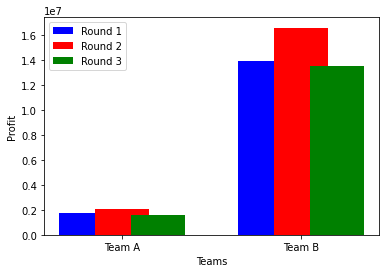

In [51]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(2)
y1 = [year_profit['profit'][0], year_profit['profit'][3]]
y2 = [year_profit['profit'][1], year_profit['profit'][4]]
y3 = [year_profit['profit'][2], year_profit['profit'][5]]

width = 0.3
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='red')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B'])
plt.xlabel("Teams")
plt.ylabel("Profit")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()

In [59]:
df['profit percent'] = (df['profit']/(df['Cost of Trip']))*100

In [351]:
df['profit per km'] = (df['profit']/(df['KM Travelled']))

In [352]:
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,format_date,year,month,Quadrant,profit,income_class,age class,profit per km
0,10008434,1,Cash,Male,36,16359,42406.0,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,2016-02-06,2016.0,2.0,Q1,846.2712,high,mid_low,19.921638
1,10012732,1,Card,Male,36,16359,42433.0,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,2016-03-04,2016.0,3.0,Q1,245.1700,high,mid_low,5.782311
2,10053182,1,Card,Male,36,16359,42564.0,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,2016-07-13,2016.0,7.0,Q3,132.7368,high,mid_low,16.346897
3,10055394,1,Cash,Male,36,16359,42575.0,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,2016-07-24,2016.0,7.0,Q3,285.7888,high,mid_low,13.927329
4,10074090,1,Cash,Male,36,16359,42616.0,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,2016-09-03,2016.0,9.0,Q3,302.1568,high,mid_low,13.405359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10393188,60000,Cash,Female,27,20303,43392.0,Yellow Cab,BOSTON MA,8.00,114.87,111.3600,2018-10-19,2018.0,10.0,Q4,3.5100,high,mid_low,0.438750
440094,10425458,60000,Card,Female,27,20303,43449.0,Yellow Cab,BOSTON MA,10.40,141.24,124.8000,2018-12-15,2018.0,12.0,Q4,16.4400,high,mid_low,1.580769
440095,10425480,60000,Card,Female,27,20303,43445.0,Yellow Cab,BOSTON MA,9.70,127.62,132.6960,2018-12-11,2018.0,12.0,Q4,-5.0760,high,mid_low,-0.523299
440096,10434169,60000,Cash,Female,27,20303,43462.0,Yellow Cab,BOSTON MA,35.64,603.94,487.5552,2018-12-28,2018.0,12.0,Q4,116.3848,high,mid_low,3.265567


In [98]:
df_profit_city=df.groupby(['Company', 'City'])[['profit percent']].mean().reset_index()

In [79]:
df_profit_city

,Company,City,profit percent
0,Pink Cab,ATLANTA GA,22.366576
1,Pink Cab,AUSTIN TX,33.124570
2,Pink Cab,BOSTON MA,20.682036
3,Pink Cab,CHICAGO IL,14.062613
4,Pink Cab,DALLAS TX,7.834718
5,Pink Cab,DENVER CO,11.961548
6,Pink Cab,LOS ANGELES CA,23.113694
7,Pink Cab,MIAMI FL,33.004664
8,Pink Cab,NASHVILLE TN,14.243584
9,Pink Cab,NEW YORK NY,43.993889


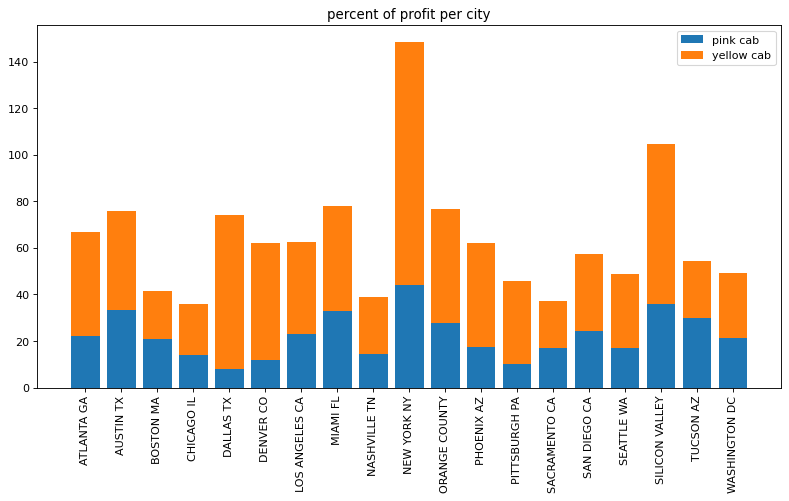

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
labels = df_profit_city['City'][0:19] 
data1 = df_profit_city['profit percent'][0:19]
data2 = df_profit_city['profit percent'][19:38]
plt.bar(labels, data1, label = 'pink cab')
plt.bar(labels, data2, bottom=data1, label = 'yellow cab')
plt.xticks(rotation=90)
plt.title('percent of profit per city')
plt.legend(loc = 'upper right')
plt.show()

In [115]:
len(data2)

19

In [100]:
df_profit_km=df.groupby(['Company', 'year'])[['profit per km']].mean().reset_index()

In [101]:
df_profit_km

,Company,year,profit per km
0,Pink Cab,2016.0,3.026813
1,Pink Cab,2017.0,2.962883
2,Pink Cab,2018.0,2.350447
3,Yellow Cab,2016.0,7.489847
4,Yellow Cab,2017.0,7.494612
5,Yellow Cab,2018.0,6.364805


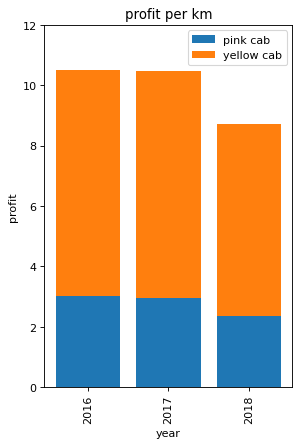

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(4, 6), dpi=80)
labels = ['2016','2017','2018'] 
data1 = df_profit_km['profit per km'][0:3]
data2 = df_profit_km['profit per km'][3:6]
plt.bar(labels, data1, label = 'pink cab')
plt.bar(labels, data2, bottom=data1, label = 'yellow cab')
plt.ylim(0, 12)
plt.xticks(rotation=90)
plt.title('profit per km')
plt.legend(loc = 'upper right')
plt.xlabel('year')
plt.ylabel('profit')
plt.show()

In [126]:
df_profit_year=df.groupby(['Company', 'year'])[['profit']].sum().reset_index()

In [127]:
df_profit_year

,Company,year,profit
0,Pink Cab,2016.0,1.713511e+06
1,Pink Cab,2017.0,2.033655e+06
2,Pink Cab,2018.0,1.560162e+06
3,Yellow Cab,2016.0,1.392700e+07
4,Yellow Cab,2017.0,1.657598e+07
5,Yellow Cab,2018.0,1.351740e+07


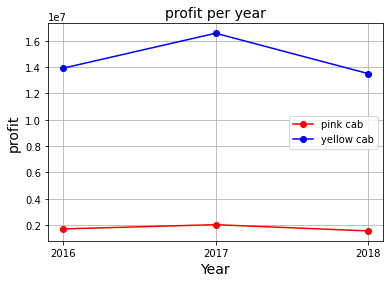

In [134]:
plt.plot(['2016','2017','2018'], df_profit_year['profit'][0:3], color='red', marker='o', label = 'pink cab')
plt.plot(['2016','2017','2018'], df_profit_year['profit'][3:6], color='blue', marker='o', label = 'yellow cab')
plt.title('profit per year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('profit', fontsize=14)
plt.grid(True)
plt.legend(loc = 'right')
plt.show()

In [142]:
df_profit_Gender=df.groupby(['Company', 'Gender'])[['profit']].sum().reset_index()

In [143]:
df_profit_Gender

,Company,Gender,profit
0,Pink Cab,Female,2.330533e+06
1,Pink Cab,Male,2.976796e+06
2,Yellow Cab,Female,1.813142e+07
3,Yellow Cab,Male,2.588896e+07


In [151]:
count_df['Total Profit']

,Number of rides,Total Profit,Profit per ride
Company,,,
Pink Cab,84711,5.307328e+06,62.652174
Yellow Cab,274681,4.402037e+07,160.259986


In [152]:
profit_percent = []
profit_percent.append((df_profit_Gender['profit'][0]/count_df['Total Profit'][0])*100)
profit_percent.append((df_profit_Gender['profit'][1]/count_df['Total Profit'][0])*100)
profit_percent.append((df_profit_Gender['profit'][2]/count_df['Total Profit'][1])*100)
profit_percent.append((df_profit_Gender['profit'][3]/count_df['Total Profit'][1])*100)

In [153]:
df_profit_Gender['Profit percent'] = profit_percent

In [154]:
df_profit_Gender

,Company,Gender,profit,Profit percent
0,Pink Cab,Female,2.330533e+06,43.911598
1,Pink Cab,Male,2.976796e+06,56.088402
2,Yellow Cab,Female,1.813142e+07,41.188696
3,Yellow Cab,Male,2.588896e+07,58.811304


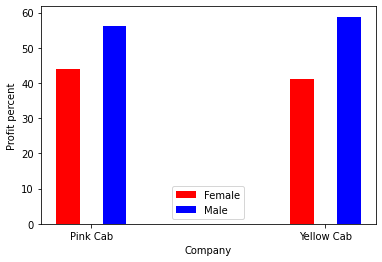

In [159]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(2)
y1 = [df_profit_Gender['Profit percent'][0], df_profit_Gender['Profit percent'][2]]
y2 = [df_profit_Gender['Profit percent'][1], df_profit_Gender['Profit percent'][3]]


width = 0.1
  
# plot data in grouped manner of bar type
plt.bar(x-0.1, y1, width, color='red')
plt.bar(x+0.1, y2, width, color='blue')

plt.xticks(x, ['Pink Cab', 'Yellow Cab'])
plt.xlabel("Company")
plt.ylabel("Profit percent")
plt.legend(["Female", "Male"])
plt.show()

In [174]:
df_profit_quad=df.groupby(['Company', 'year', 'Quadrant'])[['profit']].sum().reset_index()

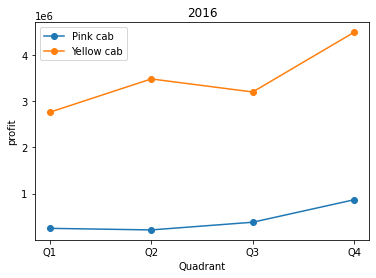

In [206]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
X = ['Q1', 'Q2', 'Q3', 'Q4']


Y1a = df_profit_quad['profit'][0:4] 
Y1b = df_profit_quad['profit'][12:16] 
Y2a = df_profit_quad['profit'][4:8] 
Y2b = df_profit_quad['profit'][16:20] 
Y3a = df_profit_quad['profit'][8:12] 
Y3b = df_profit_quad['profit'][20:24] 





plt.plot(X, Y1a, marker = 'o', label = 'Pink cab')
plt.plot(X, Y1b, marker = 'o', label = 'Yellow cab')
plt.title("2016")
plt.xlabel('Quadrant')
plt.ylabel('profit')
plt.legend()
plt.show()


Text(0, 0.5, 'profit')

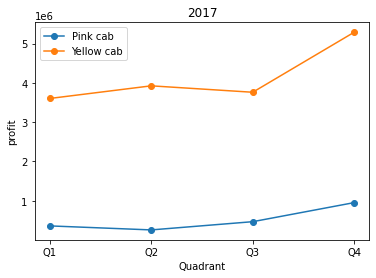

In [207]:

plt.plot(X, Y2a, marker = 'o', label = 'Pink cab')
plt.plot(X, Y2b, marker = 'o', label = 'Yellow cab')
plt.title("2017")
plt.xlabel('Quadrant')
plt.legend()
plt.ylabel('profit')

Text(0, 0.5, 'profit')

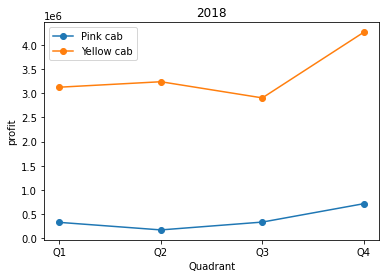

In [208]:
plt.plot(X, Y3a, marker = 'o', label = 'Pink cab')
plt.plot(X, Y3b, marker = 'o', label = 'Yellow cab')
plt.title("2018")
plt.legend()
plt.xlabel('Quadrant')
plt.ylabel('profit')

In [210]:
df
income_class = []
low_income  = 52200/12
high_income = 156600/12

for i in df['Income (USD/Month)']:
    if i < low_income:
        income_class.append('low')
    elif i > low_income and i<high_income:
        income_class.append('mid')
    else:
        income_class.append('high')
        

In [211]:
df['income_class'] = income_class

In [242]:
df_income = df.groupby(['Company','income_class'])[['profit']].sum().reset_index()

In [243]:
df_income

,Company,income_class,profit
0,Pink Cab,high,3.024258e+06
1,Pink Cab,low,4.971463e+05
2,Pink Cab,mid,1.785924e+06
3,Yellow Cab,high,2.513763e+07
4,Yellow Cab,low,4.085019e+06
5,Yellow Cab,mid,1.479772e+07


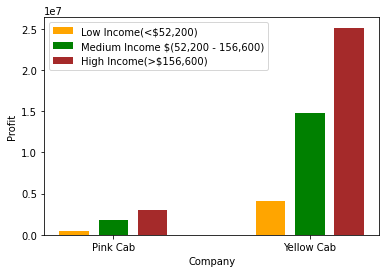

In [263]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(2)
y1 = [df_income['profit'][1], df_income['profit'][4]]
y2 = [df_income['profit'][2], df_income['profit'][5]]
y3 = [df_income['profit'][0], df_income['profit'][3]]


width = 0.15
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='orange')
plt.bar(x, y2, width, color='green')
plt.bar(x+0.2, y3, width, color='brown')

plt.xticks(x, ['Pink Cab', 'Yellow Cab'])
plt.xlabel("Company")
plt.ylabel("Profit")
plt.legend(["Low Income(<$52,200)", "Medium Income $(52,200 - 156,600)",'High Income(>$156,600)'])
plt.show()

In [265]:
age_class = []
low_income  = 18
med_low_age = 25
med_high_age = 40
high_age = 60


for i in df['Age']:
    if i < med_low_age:
        age_class.append('young')
    elif i > med_low_age and i<med_high_age:
        age_class.append('mid_low')
    elif i > med_high_age and i<high_age:
        age_class.append('med_high')
    else:
        age_class.append('high')
        

In [266]:
df['age class'] = age_class

In [267]:
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,format_date,year,month,Quadrant,profit,income_class,age class
0,10008434,1,Cash,Male,36,16359,42406.0,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,2016-02-06,2016.0,2.0,Q1,846.2712,high,mid_low
1,10012732,1,Card,Male,36,16359,42433.0,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,2016-03-04,2016.0,3.0,Q1,245.1700,high,mid_low
2,10053182,1,Card,Male,36,16359,42564.0,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,2016-07-13,2016.0,7.0,Q3,132.7368,high,mid_low
3,10055394,1,Cash,Male,36,16359,42575.0,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,2016-07-24,2016.0,7.0,Q3,285.7888,high,mid_low
4,10074090,1,Cash,Male,36,16359,42616.0,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,2016-09-03,2016.0,9.0,Q3,302.1568,high,mid_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10393188,60000,Cash,Female,27,20303,43392.0,Yellow Cab,BOSTON MA,8.00,114.87,111.3600,2018-10-19,2018.0,10.0,Q4,3.5100,high,mid_low
440094,10425458,60000,Card,Female,27,20303,43449.0,Yellow Cab,BOSTON MA,10.40,141.24,124.8000,2018-12-15,2018.0,12.0,Q4,16.4400,high,mid_low
440095,10425480,60000,Card,Female,27,20303,43445.0,Yellow Cab,BOSTON MA,9.70,127.62,132.6960,2018-12-11,2018.0,12.0,Q4,-5.0760,high,mid_low
440096,10434169,60000,Cash,Female,27,20303,43462.0,Yellow Cab,BOSTON MA,35.64,603.94,487.5552,2018-12-28,2018.0,12.0,Q4,116.3848,high,mid_low


In [331]:
df_age = df.groupby(['Company','age class','year'])[['profit']].sum()

In [332]:
df_age

profit
Company    age class year                
Pink Cab   high      2016.0  2.288577e+05
                     2017.0  2.564377e+05
                     2018.0  1.947779e+05
           med_high  2016.0  3.448037e+05
                     2017.0  4.085401e+05
                     2018.0  3.119531e+05
           mid_low   2016.0  7.601841e+05
                     2017.0  8.836227e+05
                     2018.0  6.904358e+05
           young     2016.0  3.796657e+05
                     2017.0  4.850544e+05
                     2018.0  3.629954e+05
Yellow Cab high      2016.0  1.698398e+06
                     2017.0  2.063745e+06
                     2018.0  1.689886e+06
           med_high  2016.0  2.863741e+06
                     2017.0  3.441001e+06
                     2018.0  2.814708e+06
           mid_low   2016.0  6.201356e+06
                     2017.0  7.283309e+06
                     2018.0  5.919833e+06
           young     2016.0  3.163501e+06
                     2017.0  3.787922e+06
                     2018.0  3.092972e+06

In [334]:
age_pink = pd.DataFrame({
    '>60': list(df_age['profit']['Pink Cab']['high']),
    '40-60': list(df_age['profit']['Pink Cab']['med_high']),
    '25-40': list(df_age['profit']['Pink Cab']['mid_low']),
    '18-25': list(df_age['profit']['Pink Cab']['young'])
},
    index = ['2016', '2017', '2018'])

(0.0, 2500000.0)

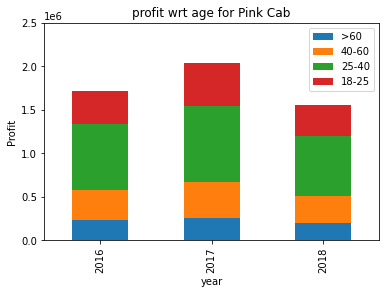

In [343]:
age_pink.plot(kind = 'bar', stacked = True)
plt.title("profit wrt age for Pink Cab")
plt.xlabel("year")
plt.ylabel("Profit")
plt.ylim(top =2500000)

(0.0, 21000000.0)

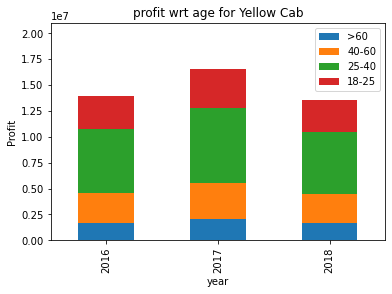

In [347]:
age_yellow = pd.DataFrame({
    '>60': list(df_age['profit']['Yellow Cab']['high']),
    '40-60': list(df_age['profit']['Yellow Cab']['med_high']),
    '25-40': list(df_age['profit']['Yellow Cab']['mid_low']),
    '18-25': list(df_age['profit']['Yellow Cab']['young'])
},
    index = ['2016', '2017', '2018'])
age_yellow.plot(kind = 'bar', stacked = True)
plt.title("profit wrt age for Yellow Cab")
plt.xlabel("year")
plt.ylabel("Profit")
plt.ylim(top = 21000000)

(0.0, 40000.0)

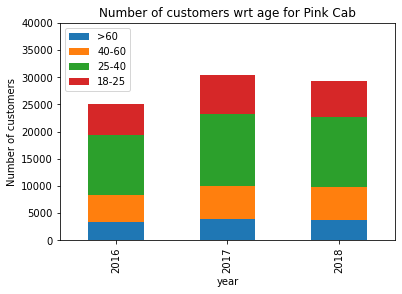

In [359]:
df_age2 = df.groupby(['Company','age class','year'])[['profit']].count()
age_pink2 = pd.DataFrame({
    '>60': list(df_age2['profit']['Pink Cab']['high']),
    '40-60': list(df_age2['profit']['Pink Cab']['med_high']),
    '25-40': list(df_age2['profit']['Pink Cab']['mid_low']),
    '18-25': list(df_age2['profit']['Pink Cab']['young'])
},
    index = ['2016', '2017', '2018'])
age_pink2.plot(kind = 'bar', stacked = True)
plt.title("Number of customers wrt age for Pink Cab")
plt.xlabel("year")
plt.ylabel("Number of customers")
plt.ylim(top = 40000)


(0.0, 130000.0)

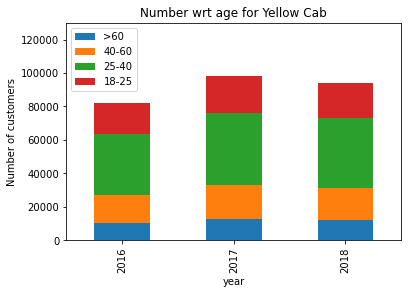

In [362]:
age_yellow2 = pd.DataFrame({
    '>60': list(df_age2['profit']['Yellow Cab']['high']),
    '40-60': list(df_age2['profit']['Yellow Cab']['med_high']),
    '25-40': list(df_age2['profit']['Yellow Cab']['mid_low']),
    '18-25': list(df_age2['profit']['Yellow Cab']['young'])
},
    index = ['2016', '2017', '2018'])
age_yellow2.plot(kind = 'bar', stacked = True)
plt.title("Number wrt age for Yellow Cab")
plt.xlabel("year")
plt.ylabel("Number of customers")
plt.ylim(top = 130000)


In [378]:
df_ret = df.groupby(['Company','year','Customer ID'])[['profit']].agg(count = ('profit', 'count'))

In [381]:
df_ret = df_ret.drop(df_ret[df_ret['count'] < 5].index).reset_index()

In [405]:
df_return=df_ret.groupby(['Company', 'year'])[['count']].count()

In [406]:
df_return

count
Company    year         
Pink Cab   2016.0    201
           2017.0    393
           2018.0    336
Yellow Cab 2016.0   6252
           2017.0   7765
           2018.0   7371

In [418]:
 df.groupby(['Company','year','Customer ID'])[['profit']].agg(count = ('profit', 'count')).reset_index().groupby(['Company','year'])[['count']].agg(count_2 = ('count','count'))

count_2
Company    year           
Pink Cab   2016.0    16661
           2017.0    18643
           2018.0    18400
Yellow Cab 2016.0    25937
           2017.0    27789
           2018.0    27470

In [419]:
df_return['total'] = df.groupby(['Company','year','Customer ID'])[['profit']].agg(count = ('profit', 'count')).reset_index().groupby(['Company','year'])[['count']].agg(count_2 = ('count','count'))['count_2']

In [420]:
df_return['percent'] = (df_return['count']/df_return['total'])*100

In [421]:
df_return

count  total    percent
Company    year                           
Pink Cab   2016.0    201  16661   1.206410
           2017.0    393  18643   2.108030
           2018.0    336  18400   1.826087
Yellow Cab 2016.0   6252  25937  24.104561
           2017.0   7765  27789  27.942711
           2018.0   7371  27470  26.832909

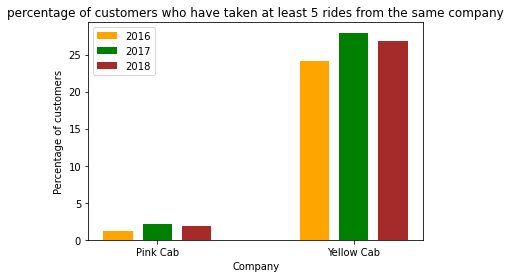

In [423]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(2)
y1 = [df_return['percent'][0], df_return['percent'][3]]
y2 = [df_return['percent'][1], df_return['percent'][4]]
y3 = [df_return['percent'][2], df_return['percent'][5]]


width = 0.15
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='orange')
plt.bar(x, y2, width, color='green')
plt.bar(x+0.2, y3, width, color='brown')

plt.xticks(x, ['Pink Cab', 'Yellow Cab'])
plt.xlabel("Company")
plt.ylabel("Percentage of customers")
plt.legend(["2016", "2017",'2018'])
plt.title('percentage of customers who have taken at least 5 rides from the same company')
plt.show()

In [429]:
df_ret2 = df.groupby(['Company','year','Customer ID'])[['profit']].agg(count = ('profit', 'count'))
df_ret2 = df_ret2.drop(df_ret2[df_ret2['count'] < 3].index).reset_index()
df_return2=df_ret2.groupby(['Company', 'year'])[['count']].count()
df_return2['total'] = df.groupby(['Company','year','Customer ID'])[['profit']].agg(count = ('profit', 'count')).reset_index().groupby(['Company','year'])[['count']].agg(count_2 = ('count','count'))['count_2']
df_return2['percent'] = (df_return2['count']/df_return2['total'])*100


In [430]:
df_return2

count  total    percent
Company    year                           
Pink Cab   2016.0   1983  16661  11.902047
           2017.0   2894  18643  15.523253
           2018.0   2714  18400  14.750000
Yellow Cab 2016.0  11260  25937  43.412885
           2017.0  12657  27789  45.546799
           2018.0  12334  27470  44.899891

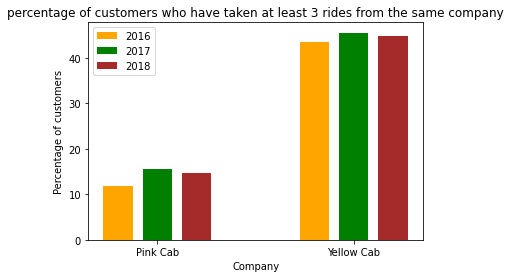

In [433]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(2)
y1 = [df_return2['percent'][0], df_return2['percent'][3]]
y2 = [df_return2['percent'][1], df_return2['percent'][4]]
y3 = [df_return2['percent'][2], df_return2['percent'][5]]


width = 0.15
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='orange')
plt.bar(x, y2, width, color='green')
plt.bar(x+0.2, y3, width, color='brown')

plt.xticks(x, ['Pink Cab', 'Yellow Cab'])
plt.xlabel("Company")
plt.ylabel("Percentage of customers")
plt.legend(["2016", "2017",'2018'])
plt.title('percentage of customers who have taken at least 3 rides from the same company')
plt.show()

In [557]:
ts_pink = pd.DataFrame({
    'date': df.drop(df[df['Company']=='Yellow Cab'].index)['format_date'],
    'profit': df.drop(df[df['Company']=='Yellow Cab'].index)['profit']
}).groupby('date').sum()
ts_yellow = pd.DataFrame({
    'date': df.drop(df[df['Company']=='Pink Cab'].index)['format_date'],
    'profit': df.drop(df[df['Company']=='Pink Cab'].index)['profit']
}).groupby('date').sum()